**Brian Blaylock**

# 👨🏻‍🏫 `hrrrb.archive` Examples

In [1]:
from datetime import datetime, timedelta
from pandas import date_range

########################################################################
# For the purpose of these notebooks, I need to tell python to look
# for the hrrrb package one directory back. You shouldn't
# need this line if you installed hrrrb with PyPI.
import sys; sys.path.append('../')
########################################################################

from hrrrb.archive import download_hrrr, get_hrrr

# Example #1
## Download full HRRR files
- for every hour between two dates
- only get analyses (F00)
- get the surface, 'sfc', fileds (not the pressure 'prs' fileds which are much larger files).

By default, data is downloaded to the user's home directory in `~/data/hrrr`.

In [2]:
DATES = date_range('2019-7-4 00:00', '2019-7-4 03:00', freq='1H')

download_hrrr(DATES)

👨🏻‍🏭 Created directory: [C:\Users\blaylockbk\data\hrrr]
💡 Info: Downloading [4] GRIB2 files

👨🏻‍🏭 Created directory: [C:\Users\blaylockbk\data\hrrr\20190704]
✅ Success! Downloaded from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/4 completed] >> Est. Time Remaining 0:01:17.956794  

✅ Success! Downloaded from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_hrrr.t01z.wrfsfcf00.grib2
🚛💨 Download Progress: [2/4 completed] >> Est. Time Remaining 0:00:46.625462  

✅ Success! Downloaded from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_hrrr.t02z.wrfsfcf00.grib2
🚛💨 Download Progress: [3/4 completed] >> Est. Time Remaining 0:00:25.292884  

✅ Success! Downloaded from [pando] 

(array([WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/20190704_hrrr.t00z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/20190704_hrrr.t01z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/20190704_hrrr.t02z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/20190704_hrrr.t03z.wrfsfcf00.grib2')],
       dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t03z.wrfsfcf00.grib2'],
       dtype='<U77'))

### Use the `dryrun=True` option to see what will happen without actually downloading anything

In [3]:
download_hrrr(DATES, fxx=[0], field='sfc', dryrun=True)

🌵 Info: Dry Run [4] GRIB2 files

🌵 Dry Run! Would get from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/4 completed] >> Est. Time Remaining 0:00:02.310171  

🌵 Dry Run! Would get from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_hrrr.t01z.wrfsfcf00.grib2
🚛💨 Download Progress: [2/4 completed] >> Est. Time Remaining 0:00:01.509858  

🌵 Dry Run! Would get from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_hrrr.t02z.wrfsfcf00.grib2
🚛💨 Download Progress: [3/4 completed] >> Est. Time Remaining 0:00:00.771946  

🌵 Dry Run! Would get from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t03z.wrfsfcf00.grib2 as C:\Users\blaylockbk\data\hrrr\20190704\20190704_

(array([None, None, None, None], dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t03z.wrfsfcf00.grib2'],
       dtype='<U77'))

### Set `verbose=False` to not print so much stuff to the screen

In [4]:
download_hrrr(DATES, fxx=[0], field='sfc', verbose=False, dryrun=True)

🌵 Info: Dry Run [4] GRIB2 files


🍦 Finished 🍦  Time spent on download: 0:00:03.154541


(array([None, None, None, None], dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t03z.wrfsfcf00.grib2'],
       dtype='<U77'))

# Example #2
## Download subset from files (by GRIB message)
- same as above
- except only get 10-meter u and v wind compoenent, (instead of the full file).

In [5]:
DATES = date_range('2019-7-4 00:00', '2019-7-4 03:00', freq='1H')

download_hrrr(DATES, searchString=':(U|V)GRD:10 m',
              fxx=[0], field='sfc')

💡 Info: Downloading [4] GRIB2 files

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20190704\subset_20190704_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/4 completed] >> Est. Time Remaining 0:00:18.321039  

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20190704\subset_20190704_hrrr.t01z.wrfsfcf00.grib2
🚛💨 Download Progress: [2/4 completed] >> Est. Time Remaining 0:00:12.219656  

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20190704\subset_20190704_hrrr.t02z.wrfsfcf00.grib2
🚛💨 Download Progress: [3/4 completed] >> Est. Time Remaining 0:00:06.212070  

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20190704\subset_20190

(array([WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/subset_20190704_hrrr.t00z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/subset_20190704_hrrr.t01z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/subset_20190704_hrrr.t02z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20190704/subset_20190704_hrrr.t03z.wrfsfcf00.grib2')],
       dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t03z.wrfsfcf00.grib2'],
       dtype='<U77'))

### with `verbose=False` and `dryrun=True` option...

In [6]:
DATES = date_range('2019-7-4 00:00', '2019-7-4 03:00', freq='1H')

download_hrrr(DATES, searchString=':(U|V)GRD:10 m',
              fxx=[0], field='sfc', verbose=False, dryrun=True)

🌵 Info: Dry Run [4] GRIB2 files


🍦 Finished 🍦  Time spent on download: 0:00:07.329919


(array([None, None, None, None], dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t00z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t01z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t02z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190704/hrrr.t03z.wrfsfcf00.grib2'],
       dtype='<U77'))

## For the HRRR-Alaska model
Remember, HRRR-Alaska is only run every three hours (not every hour).

In [18]:
DATES = date_range('2019-7-4 00:00', '2019-7-4 12:00', freq='3H')

download_hrrr(DATES, searchString=':(U|V)GRD:10 m', model='alaska',
              fxx=[0], field='sfc')

💡 Info: Downloading [5] GRIB2 files

👨🏻‍🏭 Created directory: [C:\Users\blaylockbk\data\hrrrak\20190704]
Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrrak\20190704\subset_20190704_hrrrak.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/5 completed] >> Est. Time Remaining 0:00:28.491824  

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrrak\20190704\subset_20190704_hrrrak.t03z.wrfsfcf00.grib2
🚛💨 Download Progress: [2/5 completed] >> Est. Time Remaining 0:00:23.438142  

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrrak\20190704\subset_20190704_hrrrak.t06z.wrfsfcf00.grib2
🚛💨 Download Progress: [3/5 completed] >> Est. Time Remaining 0:00:15.707880  

Download subset from [pando]:
✅ Success! Searched for [:(U|V)GRD:10 m] and got [

(array([WindowsPath('C:/Users/blaylockbk/data/hrrrak/20190704/subset_20190704_hrrrak.t00z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrrak/20190704/subset_20190704_hrrrak.t03z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrrak/20190704/subset_20190704_hrrrak.t06z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrrak/20190704/subset_20190704_hrrrak.t09z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrrak/20190704/subset_20190704_hrrrak.t12z.wrfsfcf00.grib2')],
       dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrrak/sfc/20190704/hrrrak.t00z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrrak/sfc/20190704/hrrrak.t03z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrrak/sfc/20190704/hrrrak.t06z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrrak/sfc/20190704/hrrrak.t09z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrrak/sfc/201907

# Example #3
## Download and return as xarray Dataset
Subset data by fields for 2 m above the ground.
Downloads the GRIB2 as a temporary file (`remove_grib2=True`) and read data as an xarray Dataset.

In [7]:
DATE = datetime(2019, 7, 4)

H = get_hrrr(DATE, searchString=':2 m', fxx=0, field='sfc', remove_grib2=True)

💡 Info: Downloading [1] GRIB2 files

Download subset from [pando]:
✅ Success! Searched for [:2 m] and got [5] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20190704\subset_20190704_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:13.751238


In [8]:
H

<xarray.Dataset>
Dimensions:            (x: 1799, y: 1059)
Coordinates:
    time               datetime64[ns] 2019-07-04
    step               timedelta64[ns] 00:00:00
    heightAboveGround  int32 2
    latitude           (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude          (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time         datetime64[ns] 2019-07-04
Dimensions without coordinates: x, y
Data variables:
    pt                 (y, x) float32 294.80124 294.80124 ... 283.36374
    q                  (y, x) float32 0.0139 0.0139 0.0139 ... 0.00779 0.00777
    t2m                (y, x) float32 295.9871 295.9246 ... 284.2371 284.1746
    d2m                (y, x) float32 292.51355 292.51355 ... 283.51355
    r2                 (y, x) float32 81.3 81.4 81.4 81.5 ... 95.0 95.0 95.0
Attributes:
    GRIB_edition:                   2
    GRIB_centre:                    kwbc
    GRIB_centreDescription:         US National Weather Service - NCEP 
    GRIB_subCentre:                 0
    Conventions:                    CF-1.7
    institution:                    US National Weather Service - NCEP 
    history:                        {'DATE': datetime.datetime(2019, 7, 4, 0,...
    url:                            https://pando-rgw01.chpc.utah.edu/hrrr/sf...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              (38.5, 38.5)
    longitude_of_central_meridian:  262.5
    latitude_of_projection_origin:  38.5
    crs:                            <cartopy.crs.LambertConformal object at 0...

# Example #4
## Files download from NOMADS instead of Pando if datetime requested is for yesterday or today.
HRRR files are available on the NOMADS server for runs from today and yesterday. Download the files from NOMADS for those dates. (Notice the data source announced in the printed statement.)

In [9]:
today = datetime.utcnow()
oneDayAgo = datetime(today.year, today.month, today.day) - timedelta(days=1)
twoDaysAgo = datetime(today.year, today.month, today.day) - timedelta(days=2)

sDATE = datetime(twoDaysAgo.year, twoDaysAgo.month, twoDaysAgo.day, 22)
eDATE = datetime(oneDayAgo.year, oneDayAgo.month, oneDayAgo.day, 2)

# This range of dates will get files from Pando and NOMADS
DATES = date_range(sDATE, eDATE, freq='1H')
DATES

DatetimeIndex(['2020-09-28 22:00:00', '2020-09-28 23:00:00',
               '2020-09-29 00:00:00', '2020-09-29 01:00:00',
               '2020-09-29 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [10]:
download_hrrr(DATES, searchString='(TMP|DPT):500 mb')

💡 Info: Downloading [5] GRIB2 files

👨🏻‍🏭 Created directory: [C:\Users\blaylockbk\data\hrrr\20200929]
Download subset from [pando]:
✅ Success! Searched for [(TMP|DPT):500 mb] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20200929\subset_20200928_hrrr.t22z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/5 completed] >> Est. Time Remaining 0:00:23.851860  

Download subset from [pando]:
✅ Success! Searched for [(TMP|DPT):500 mb] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20200929\subset_20200928_hrrr.t23z.wrfsfcf00.grib2
🚛💨 Download Progress: [2/5 completed] >> Est. Time Remaining 0:00:17.202456  

Download subset from [nomads]:
✅ Success! Searched for [(TMP|DPT):500 mb] and got [2] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20200929\subset_20200929_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [3/5 completed] >> Est. Time Remaining 0:00:09.772516  

Download subset from [nomads]:
✅ Success! Searched for [(TMP|DPT):500 mb] and got [2] G

(array([WindowsPath('C:/Users/blaylockbk/data/hrrr/20200929/subset_20200928_hrrr.t22z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20200929/subset_20200928_hrrr.t23z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20200929/subset_20200929_hrrr.t00z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20200929/subset_20200929_hrrr.t01z.wrfsfcf00.grib2'),
        WindowsPath('C:/Users/blaylockbk/data/hrrr/20200929/subset_20200929_hrrr.t02z.wrfsfcf00.grib2')],
       dtype=object),
 array(['https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20200928/hrrr.t22z.wrfsfcf00.grib2',
        'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20200928/hrrr.t23z.wrfsfcf00.grib2',
        'https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20200929/conus/hrrr.t00z.wrfsfcf00.grib2',
        'https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20200929/conus/hrrr.t01z.wrfsfcf00.grib2',
        'https://nomads.ncep.noaa.gov/pub/data

---
Similiarly, if we open a file from yesterday, it will automatically download it from NOMADS

In [11]:
get_hrrr(eDATE, 'TMP:2 m')

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [TMP:2 m] and got [1] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20200929\subset_20200929_hrrr.t02z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.951698


<xarray.Dataset>
Dimensions:            (x: 1799, y: 1059)
Coordinates:
    time               datetime64[ns] 2020-09-29T02:00:00
    step               timedelta64[ns] 00:00:00
    heightAboveGround  int32 2
    latitude           (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude          (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time         datetime64[ns] 2020-09-29T02:00:00
Dimensions without coordinates: x, y
Data variables:
    t2m                (y, x) float32 296.43445 296.43445 ... 288.62195
Attributes:
    GRIB_edition:                   2
    GRIB_centre:                    kwbc
    GRIB_centreDescription:         US National Weather Service - NCEP 
    GRIB_subCentre:                 0
    Conventions:                    CF-1.7
    institution:                    US National Weather Service - NCEP 
    history:                        {'DATE': datetime.datetime(2020, 9, 29, 2...
    url:                            https://nomads.ncep.noaa.gov/pub/data/ncc...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              (38.5, 38.5)
    longitude_of_central_meridian:  262.5
    latitude_of_projection_origin:  38.5
    crs:                            <cartopy.crs.LambertConformal object at 0...

# Example #5
## Specify certain datetimes
I really like the pandas `date_range` function for making lists of datetimes. Below are some examples to customize what you want.

You can give a start and end time either as a string or as a standard datetime object.
```python
from pandas import date_range
from datetime import datetime

date_range('2020-01-01 00:00', '2020-02-01 00:00')

date_range(datetime(2020, 1, 1), datetime(2020, 2, 1))
```

In [12]:
# I want a whole month of data...every hourly RRR run in a month.
date_range('2020-01-01', '2020-02-01', freq='1H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

In [13]:
# I only want the 1800 UTC run for a month of data
date_range('2020-01-01 18:00', '2020-02-01 18:00', freq='24H')

DatetimeIndex(['2020-01-01 18:00:00', '2020-01-02 18:00:00',
               '2020-01-03 18:00:00', '2020-01-04 18:00:00',
               '2020-01-05 18:00:00', '2020-01-06 18:00:00',
               '2020-01-07 18:00:00', '2020-01-08 18:00:00',
               '2020-01-09 18:00:00', '2020-01-10 18:00:00',
               '2020-01-11 18:00:00', '2020-01-12 18:00:00',
               '2020-01-13 18:00:00', '2020-01-14 18:00:00',
               '2020-01-15 18:00:00', '2020-01-16 18:00:00',
               '2020-01-17 18:00:00', '2020-01-18 18:00:00',
               '2020-01-19 18:00:00', '2020-01-20 18:00:00',
               '2020-01-21 18:00:00', '2020-01-22 18:00:00',
               '2020-01-23 18:00:00', '2020-01-24 18:00:00',
               '2020-01-25 18:00:00', '2020-01-26 18:00:00',
               '2020-01-27 18:00:00', '2020-01-28 18:00:00',
               '2020-01-29 18:00:00', '2020-01-30 18:00:00',
               '2020-01-31 18:00:00', '2020-02-01 18:00:00'],
              dtype='da

In [14]:
# I want the model runs ever 12 hours for a week...
date_range('2020-01-01 00:00', '2020-01-07 00:00', freq='12H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 12:00:00',
               '2020-01-02 00:00:00', '2020-01-02 12:00:00',
               '2020-01-03 00:00:00', '2020-01-03 12:00:00',
               '2020-01-04 00:00:00', '2020-01-04 12:00:00',
               '2020-01-05 00:00:00', '2020-01-05 12:00:00',
               '2020-01-06 00:00:00', '2020-01-06 12:00:00',
               '2020-01-07 00:00:00'],
              dtype='datetime64[ns]', freq='12H')

### `runDATE` versus `validDATE`
Sometimes you want to get the data in terms of when the model if *valid* rather than when it is *initialized*. In this case, you will need a loop to offset the datetime by the forecast hour.

For example, if you want the 6-hour forecast valid at 18:00 UTC, you need to get the F06 from the 12:00 UTC run.

In [15]:
validDATE = datetime(2020, 1, 1, 18)
lead_time = 6

runDATE = validDATE - timedelta(hours=lead_time)

print('Valid Date:', validDATE)
print('  Run Date:', runDATE, f'  Lead Time: F{lead_time:02d}')

download_hrrr(runDATE, fxx=lead_time, dryrun=True)

Valid Date: 2020-01-01 18:00:00
  Run Date: 2020-01-01 12:00:00   Lead Time: F06
🌵 Info: Dry Run [1] GRIB2 files

👨🏻‍🏭 Created directory: [C:\Users\blaylockbk\data\hrrr\20200101]
🌵 Dry Run! Would get from [pando] https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20200101/hrrr.t12z.wrfsfcf06.grib2 as C:\Users\blaylockbk\data\hrrr\20200101\20200101_hrrr.t12z.wrfsfcf06.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:00.816763


(None,
 'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20200101/hrrr.t12z.wrfsfcf06.grib2')

##### Looping
If you want all the forecasts in a day, based on the valid times instead of the initialization times, you can use a loop.
> Note: the datetime in the filename of the GRIB2 file downloaded will be in terms of the model's initialization time. 

In [16]:
validDATES = date_range('2020-01-01', '2020-01-02', freq='6H')
fxx = [12, 18]
searchString = '((U|V)GRD:10 m|TMP:2 m|APCP)'

for D in validDATES:
    for F in fxx:
        runDATE = D - timedelta(hours=F)
        download_hrrr(runDATE, searchString=searchString, fxx=F, dryrun=True)

🌵 Info: Dry Run [1] GRIB2 files

👨🏻‍🏭 Created directory: [C:\Users\blaylockbk\data\hrrr\20191231]
Download subset from [pando]:
    🐫 Dry Run: Found GRIB line [ 66]: variable=TMP, level=2 m above ground, forecast=12 hour fcst
    🐫 Dry Run: Found GRIB line [ 71]: variable=UGRD, level=10 m above ground, forecast=12 hour fcst
    🐫 Dry Run: Found GRIB line [ 72]: variable=VGRD, level=10 m above ground, forecast=12 hour fcst
    🐫 Dry Run: Found GRIB line [ 78]: variable=APCP, level=surface, forecast=0-12 hour acc fcst
    🐫 Dry Run: Found GRIB line [ 84]: variable=APCP, level=surface, forecast=11-12 hour acc fcst
🌵 Dry Run: Success! Searched for [((U|V)GRD:10 m|TMP:2 m|APCP)] and found [5] GRIB fields. Would save as C:\Users\blaylockbk\data\hrrr\20191231\subset_20191231_hrrr.t12z.wrfsfcf12.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.841517
🌵 Info: Dry Run [1] GRIB2 files

Download subset from [pando]:

## Quick plots

In [20]:
from hrrrb.plots import simple_plot

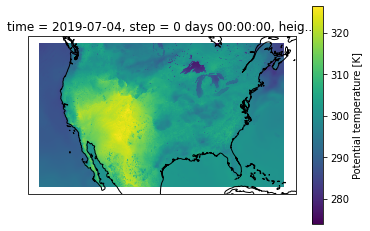

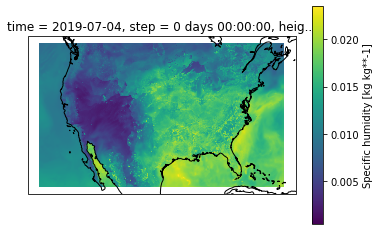

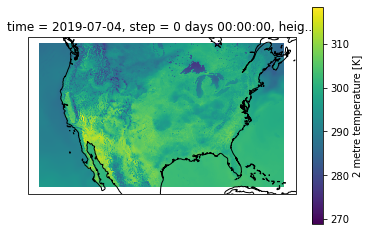

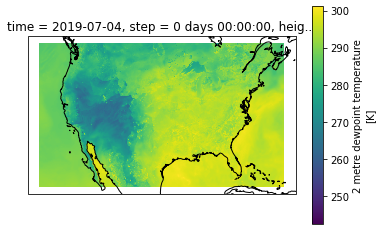

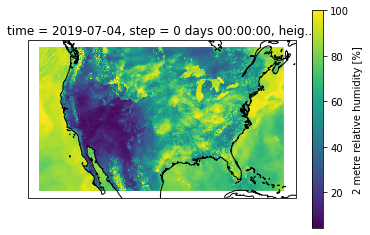

In [21]:
simple_plot(H)